# Analysis Effect of Churning on Finances Telco-customer

Project objective and aim
- To identify the effect of churn
- Create a visual representation of the result using plotly

## Information on Dataset

Using Telco Customer churn data obtain from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download.
> The data was downloaded onto a local machine on the  27/01/2025

Features of the dataset 
- Customer ID: Unique code to each customer
- Gender: Whether the customer is a male or a female
- Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)

Features of interest:  
- Tenure: Number of months the customer has stayed with the company
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
- Churn: Whether the customer churned or not (Yes or No)


## Loading dataset

Import the required libraries.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math

Loading the data

In [39]:
df = pd.read_csv('Telco-Customer-Churn-Data.csv')

## Data Exploring the data set

Displaying the top 5 rows and columns of the dataset to get a feel of how the dataset look.

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
# Exploring the numbers of rows and columns of data in the dataset.
df.shape

(7043, 21)

### Getting more information on the data

Exploring the dataset and identify the data types of each column.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



Note:
* The data set have 7043 observation and 21 variable.
* There is no missing data
* TotalCharges is an object datatype, from observation, this should be numerical data type (float or int) 

In [43]:
# changing the data type of TotalCharges from object to float and printing data types of all the columns to confirm change.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].astype("float")

# print the list of column and their data type to confimed that totalcharges has been changed to a numerical datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Wrangling

### Searching duplicates Values

In [44]:
df.duplicated().value_counts()

False    7043
Name: count, dtype: int64

No duplicate find

### Searching Missing Values

In [45]:
missing_data = df.isnull().sum()
missing_data

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Based on the above result, it can be observed that TotalCharges, have 11 missing data.
> This has no baring on feature of interesting, and in this instance it will be largely ignore. But explored to find the reason of the missing data.

#### Finding line with the missing values

In [46]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

null_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the observation of the table above, the conclusion is that the missing data are for new customer at the beginning of their contract, as a result have zero tenure, and consequently have no total charge record. Therefore, their value is being taken as zero.

#### Replacing Missing Values

In [47]:
df.replace({'TotalCharges':np.nan}, 0, inplace = True)

missing_data = df.isnull().sum()
missing_data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Analysis The Financial Aspect of the Dataset

### Selecting features of Interest

In [48]:
Financial_data = df[['tenure','Contract','MonthlyCharges','TotalCharges','Churn']]
Financial_data.head()

,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,29.85,29.85,No
1,34,One year,56.95,1889.50,No
2,2,Month-to-month,53.85,108.15,Yes
3,45,One year,42.30,1840.75,No
4,2,Month-to-month,70.70,151.65,Yes


In [49]:
Financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   Contract        7043 non-null   object 
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


### Contract Type

In [50]:
Financial_data['Contract'].value_counts().reset_index()

,Contract,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [51]:
# breaking the contract down to months - inline with tenure
category_mapping = {'Month-to-month': 1, 'One year':12, 'Two year': 24}

Financial_data.insert(2,'ContractNum', Financial_data['Contract'].map(category_mapping))

In [52]:
Financial_data[['Contract','ContractNum']].value_counts().reset_index()

,Contract,ContractNum,count
0,Month-to-month,1,3875
1,Two year,24,1695
2,One year,12,1473


In [53]:
#Adding a renewal column 
Financial_data.insert(3, 'Renewal', round(Financial_data['tenure']/Financial_data['ContractNum'], 2))

In [54]:
Financial_data.head()

,tenure,Contract,ContractNum,Renewal,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,1,1.00,29.85,29.85,No
1,34,One year,12,2.83,56.95,1889.50,No
2,2,Month-to-month,1,2.00,53.85,108.15,Yes
3,45,One year,12,3.75,42.30,1840.75,No
4,2,Month-to-month,1,2.00,70.70,151.65,Yes


In [55]:
#adding months that has been used in the current contract period
Financial_data.insert(4,'Used_Month',round((Financial_data['Renewal'] - Financial_data['Renewal'].astype(int)) 
                                           * Financial_data['ContractNum']).astype(int))

In [56]:
#adding months left on current contract period
Financial_data.insert(5, 'Month_Left',(Financial_data['ContractNum'] - Financial_data['Used_Month']).astype(int))

In [57]:
Financial_data.head()

,tenure,Contract,ContractNum,Renewal,Used_Month,Month_Left,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,1,1.00,0,1,29.85,29.85,No
1,34,One year,12,2.83,10,2,56.95,1889.50,No
2,2,Month-to-month,1,2.00,0,1,53.85,108.15,Yes
3,45,One year,12,3.75,9,3,42.30,1840.75,No
4,2,Month-to-month,1,2.00,0,1,70.70,151.65,Yes


In [58]:
Monthly_revenue = Financial_data['MonthlyCharges'].sum()
Monthly_revenue

456116.6

In [59]:
Financial_Analysis = {
    'Contract Type' : [],
    'Customer Count' : [],
    'Customer Percentage (%)' : [],
    'Average Tenure (month)' : [],
    'Average Monthly Charge' : [],
    'Total Charge': [],
    'Monthly Revenue' : [],
    'Churned Customer Count' : [],
    'Churned rate (%)' : []
}

Contract = ['Month-to-month', 'One year', 'Two year']

for contract in Contract:
    contract_data = Financial_data[Financial_data['Contract']==contract]
    churned_data = contract_data[contract_data['Churn']=='Yes']
    
    Financial_Analysis['Contract Type'].append(contract)
    Financial_Analysis['Customer Count'].append(contract_data.shape[0])
    Financial_Analysis['Customer Percentage (%)'].append(round((contract_data.shape[0]/Financial_data.shape[0])*100, 2))
    Financial_Analysis['Average Tenure (month)'].append(contract_data['tenure'].mean())
    Financial_Analysis['Average Monthly Charge'].append(contract_data['MonthlyCharges'].mean())
    Financial_Analysis['Total Charge'].append(contract_data['TotalCharges'].sum())
    Financial_Analysis['Monthly Revenue'].append(contract_data['MonthlyCharges'].sum())
    Financial_Analysis['Churned Customer Count'].append(churned_data.shape[0])
    Financial_Analysis['Churned rate (%)'].append(round((churned_data.shape[0]/contract_data.shape[0])*100,2))
        
Financial_Analysis_df = pd.DataFrame(Financial_Analysis)
Financial_Analysis_df.to_csv('Telco-Financial-Analysis.csv', index = False)
Financial_Analysis_df  
    

,Contract Type,Customer Count,Customer Percentage (%),Average Tenure (month),Average Monthly Charge,Total Charge,Monthly Revenue,Churned Customer Count,Churned rate (%)
0,Month-to-month,3875,55.02,18.036645,66.398490,5305861.5,257294.15,1655,42.71
1,One year,1473,20.91,42.044807,65.048608,4467053.5,95816.60,166,11.27
2,Two year,1695,24.07,56.735103,60.770413,6283253.7,103005.85,48,2.83


## Analysis of Churned Customer

In [60]:
Churn_data = Financial_data['Churn'].value_counts().reset_index()
Churn_data

,Churn,count
0,No,5174
1,Yes,1869


In [61]:
# Calculating the churn rate
churn_rate = round(((Churn_data.loc[1,'count'])/(len(Financial_data)))*100, 2)
churn_rate

26.54

In [62]:
Churned_data = Financial_data[Financial_data['Churn'] == 'Yes']
Churned_data.head(10)

,tenure,Contract,ContractNum,Renewal,Used_Month,Month_Left,MonthlyCharges,TotalCharges,Churn
2,2,Month-to-month,1,2.0,0,1,53.85,108.15,Yes
4,2,Month-to-month,1,2.0,0,1,70.70,151.65,Yes
5,8,Month-to-month,1,8.0,0,1,99.65,820.50,Yes
8,28,Month-to-month,1,28.0,0,1,104.80,3046.05,Yes
13,49,Month-to-month,1,49.0,0,1,103.70,5036.30,Yes
18,10,Month-to-month,1,10.0,0,1,55.20,528.35,Yes
20,1,Month-to-month,1,1.0,0,1,39.65,39.65,Yes
22,1,Month-to-month,1,1.0,0,1,20.15,20.15,Yes
26,47,Month-to-month,1,47.0,0,1,99.35,4749.15,Yes
27,1,Month-to-month,1,1.0,0,1,30.20,30.20,Yes


In [63]:
Churned_data.describe()

,tenure,ContractNum,Renewal,Used_Month,Month_Left,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,2.567683,12.810358,0.860888,1.706795,74.441332,1531.796094
std,19.531123,4.678341,15.275717,3.111923,2.613313,24.666053,1890.822994
min,1.000000,1.000000,0.170000,0.000000,1.000000,18.850000,18.850000
25%,2.000000,1.000000,2.000000,0.000000,1.000000,56.150000,134.500000
50%,10.000000,1.000000,5.580000,0.000000,1.000000,79.650000,703.550000
75%,29.000000,1.000000,18.000000,0.000000,1.000000,94.200000,2331.300000
max,72.000000,24.000000,71.000000,23.000000,24.000000,118.350000,8684.800000


In [64]:
Monthly_Revenue_lost = Churned_data['MonthlyCharges'].sum()
Monthly_Revenue_lost

139130.85

In [65]:
Financial_Analysis_Churned = {
    'Contract Type' : [],
    'Customer Count' : [],
    'Average Tenure (month)' : [],
    'Average Monthly Charge' : [],
    'Average Total Charge': [],
    'Lost Monthly Revenue' : [],
    'Contract Termination count' : [],
    'Churning during/after 1st contract': [],
    'Churned rate (%)' : []
}

Contract = ['Month-to-month', 'One year', 'Two year']

for contract in Contract:
    contract_data = Churned_data[Churned_data['Contract']==contract]
    full_contract_data = Financial_data[Financial_data['Contract'] == contract]
        
    Financial_Analysis_Churned['Contract Type'].append(contract)
    Financial_Analysis_Churned['Customer Count'].append(contract_data.shape[0])
    Financial_Analysis_Churned['Average Tenure (month)'].append(round(contract_data['tenure'].mean(), 2))
    Financial_Analysis_Churned['Average Monthly Charge'].append(round(contract_data['MonthlyCharges'].mean(),2))
    Financial_Analysis_Churned['Average Total Charge'].append(round(contract_data['TotalCharges'].mean(),2))
    Financial_Analysis_Churned['Lost Monthly Revenue'].append(contract_data['MonthlyCharges'].sum())
    Financial_Analysis_Churned['Contract Termination count'].append(contract_data[contract_data['Used_Month'] != 0].shape[0])
    Financial_Analysis_Churned['Churning during/after 1st contract'].append(contract_data[contract_data['Renewal'] <= 1].shape[0])
    Financial_Analysis_Churned['Churned rate (%)'].append(round((contract_data.shape[0]/full_contract_data.shape[0])*100,2))

Financial_Analysis_churned_df = pd.DataFrame(Financial_Analysis_Churned)
Financial_Analysis_churned_df

,Contract Type,Customer Count,Average Tenure (month),Average Monthly Charge,Average Total Charge,Lost Monthly Revenue,Contract Termination count,Churning during/after 1st contract,Churned rate (%)
0,Month-to-month,1655,14.02,73.02,1164.46,120847.10,0,380,42.71
1,One year,166,44.96,85.05,4066.21,14118.45,150,13,11.27
2,Two year,48,61.27,86.78,5432.36,4165.30,43,0,2.83


## Analysis of Non Churned Customer

In [66]:
Non_Churned_data = Financial_data[Financial_data['Churn'] == 'No']
Non_Churned_data.head(10)

,tenure,Contract,ContractNum,Renewal,Used_Month,Month_Left,MonthlyCharges,TotalCharges,Churn
0,1,Month-to-month,1,1.00,0,1,29.85,29.85,No
1,34,One year,12,2.83,10,2,56.95,1889.50,No
3,45,One year,12,3.75,9,3,42.30,1840.75,No
6,22,Month-to-month,1,22.00,0,1,89.10,1949.40,No
7,10,Month-to-month,1,10.00,0,1,29.75,301.90,No
9,62,One year,12,5.17,2,10,56.15,3487.95,No
10,13,Month-to-month,1,13.00,0,1,49.95,587.45,No
11,16,Two year,24,0.67,16,8,18.95,326.80,No
12,58,One year,12,4.83,10,2,100.35,5681.10,No
14,25,Month-to-month,1,25.00,0,1,105.50,2686.05,No


In [67]:
Monthly_Revenue = Non_Churned_data['MonthlyCharges'].sum()
Monthly_Revenue

316985.75

In [68]:
Six_Month_Projection = Non_Churned_data[Non_Churned_data['Month_Left'] >= 6]
Six_Monthly_Revenue = Six_Month_Projection['MonthlyCharges'].sum()
Six_Monthly_Revenue

113815.3

In [69]:
Twelve_Month_Projection = Non_Churned_data[Non_Churned_data['Month_Left'] >= 12]
Twelve_Monthly_Revenue = round(Twelve_Month_Projection['MonthlyCharges'].sum(), 2)
Twelve_Monthly_Revenue

55915.4

## Visualization of Data

In [70]:
# find a relationship between tenure and total changes
df_tenure_total = df.groupby('tenure')['TotalCharges'].mean()

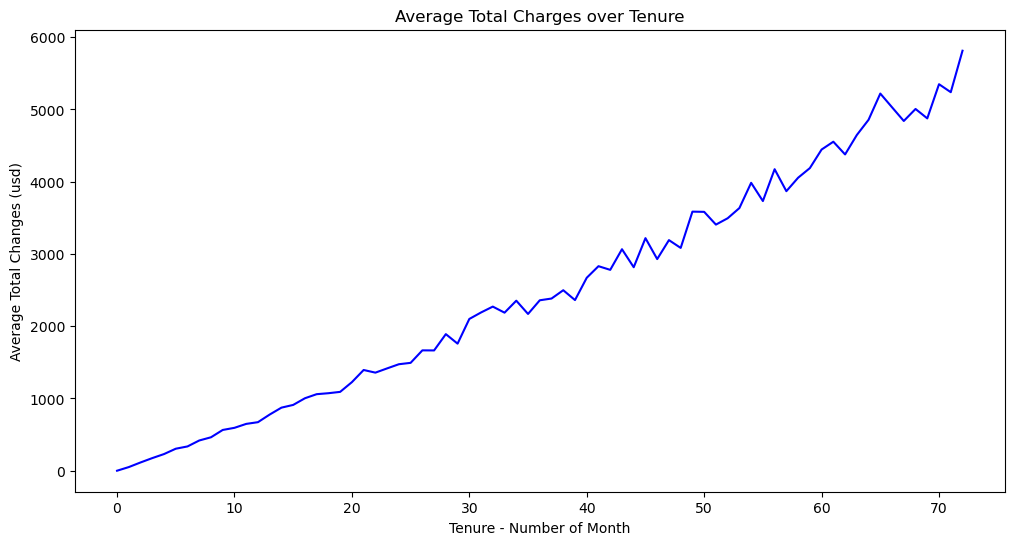

In [71]:
df_tenure_total.plot(kind ='line', figsize=(12,6), color='blue')

plt.title('Average Total Charges over Tenure')
plt.xlabel('Tenure - Number of Month')
plt.ylabel('Average Total Changes (usd)')
plt.ticklabel_format(style='plain')
plt.show()

Based on the graph above, there seem to be a positive linear relationship between total charges and lenght of tenure. 

In [72]:
# find a relationship between tenure and monthly
df_tenure_monthly = df.groupby('tenure')['MonthlyCharges'].mean()

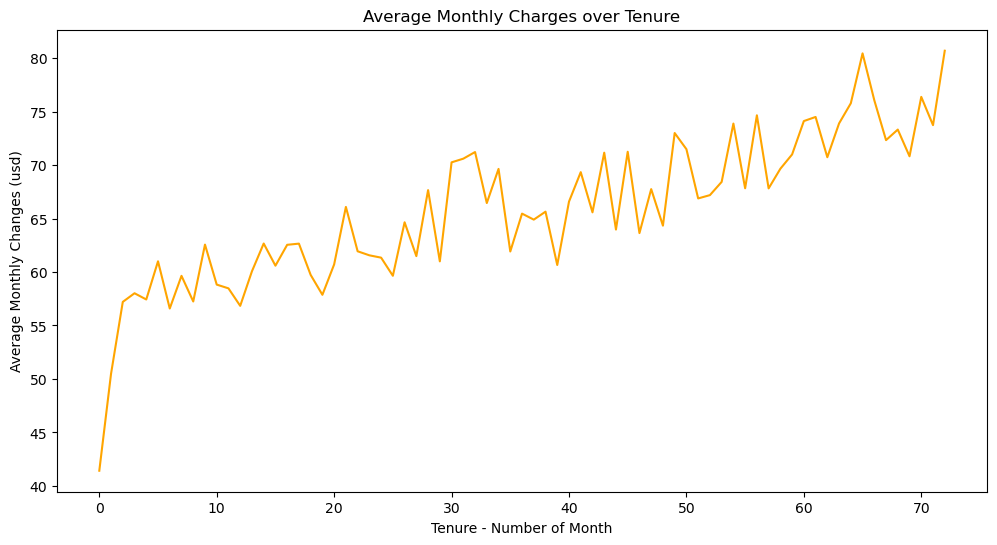

In [73]:
df_tenure_monthly.plot(kind ='line', figsize=(12,6), color='orange')
plt.title('Average Monthly Charges over Tenure')
plt.xlabel('Tenure - Number of Month')
plt.ylabel('Average Monthly Changes (usd)')
plt.ticklabel_format(style='plain')
plt.show()

Based on the graph above, it can be observed that on average, customer have had their service for longer are charged more that newer customer.

## Findings

### Contract Popularity & Revenue Insights

There are three types of contracts available:  
- **Monthly contracts** (most popular) – **55% of customers (3,875 total)**  
- **Two-year contracts** – **24% of customers (1,695 total)**  
- **Yearly contracts** – **21% of customers (1,473 total)**  

#### **Customer Tenure & Charges**
- Customers on **two-year contracts stay the longest**, with an average tenure of **56.73 months**.  
- **Yearly contracts** follow at **42.04 months**, and **monthly contracts** have the shortest tenure at **18.04 months**.  
- **Monthly contract users pay the most (€66.40 per month), while yearly (€65.05) and two-year (€60.77) contract holders pay slightly less.**  

#### **Total Revenue by Contract Type**
- **Two-year contracts generate the most revenue** (€6,283,253.7 total).  
- **Monthly contracts bring in the highest monthly revenue** (€257,294.15).  
- **Yearly contracts contribute €4,467,053.5 in total revenue and €95,816.60 monthly revenue.**  

### **Churn Rate & Customer Loss Insights**  
Churn rates vary significantly across contract types:  
- **Monthly contracts have the highest churn rate (42.71%), leading to 1,655 customers lost.**  
- **Yearly contracts have an 11.27% churn rate, losing 166 customers.**  
- **Two-year contracts have the lowest churn rate at just 2.83%, losing only 44 customers.**  

Among churned customers:  
- **Two-year contract holders have the longest tenure before leaving (61.27 months).**  
- **Yearly contract customers churn after 44.96 months.**  
- **Monthly contract churners leave much sooner (14.02 months).**  
- **Churned customers pay higher monthly charges than the overall average.**  
  - **Two-year contracts:** €86.78  
  - **Yearly contracts:** €85.05  
  - **Monthly contracts:** €73.02  

### **Revenue Loss & Contract Termination**  
After churn, monthly revenue dropped from **€456,116.6 to €316,985.75**.  
- **Projected revenue (if contracts aren’t renewed):**  
  - **6 months:** €113,815.3  
  - **12 months:** €55,915.4  

#### **Early Contract Termination**  
- **Monthly contracts** have **zero early contract terminations**.  
- **150 customers terminated yearly contracts early.**  
- **43 customers canceled two-year contracts before completion.**  
- **380 customers left after their first monthly contract ended, and 13 churned after their first yearly contract ended.**  
- **No two-year customers churned after completing their first contract term.** 


### Conclusion

#### Key Findings
1. **Monthly Contracts Dominate in Popularity but Have the Highest Churn**  
   - The **majority of customers (55%)** opt for **monthly contracts**, likely due to flexibility.  
   - However, this contract type also has the **highest churn rate (42.71%)**, leading to **1,655 customer losses**.  
   - The **short average tenure (18.04 months)** indicates that customers do not stay as long compared to yearly or two-year contract holders.  

2. **Two-Year Contracts Retain Customers Best & Generate the Most Revenue**  
   - **Two-year contracts have the lowest churn rate (2.83%)**, losing just **44 customers**.  
   - They **retain customers longer (56.73 months average tenure)**, minimizing churn impact.  
   - Although **monthly contracts generate the highest short-term revenue (€257,294.15/month)**, **two-year contracts yield the most total revenue (€6,283,253.7)** due to long-term retention.  

3. **Churned Customers Pay Higher Monthly Fees than the Average**  
   - Customers who leave tend to have **higher monthly charges** than the average:  
     - **Two-year contract churners pay €86.78**, compared to the normal €60.77.  
     - **Yearly contract churners pay €85.05**, higher than the usual €65.05.  
     - **Monthly contract churners pay €73.02**, above the standard €66.40.  
   - This may suggest that **higher pricing contributes to churn**, especially in long-term contracts.  

4. **Revenue Loss is Significant Due to Monthly Contract Churn**  
   - **Churn reduced monthly revenue from €456,116.6 to €316,985.75**, a major drop.  
   - **Monthly contracts contribute the most to lost revenue (€120,847.10).**  
   - **Long-term projections show further decline if customers do not renew:**  
     - **6-month projected revenue: €113,815.3**  
     - **12-month projected revenue: €55,915.4**  

5. **Early Contract Termination Mostly Affects Yearly & Two-Year Contracts**  
   - **150 customers ended their yearly contracts early**, while **43 canceled their two-year contracts before completion**.  
   - **Monthly contracts had zero early terminations**, likely because they have no commitment period.  
   - **Some customers leave after their first contract ends**, particularly in **monthly contracts (380 customers)** and **yearly contracts (13 customers)**.  
   - **No two-year customers churned after completing their contract term.**  

#### Implications & Recommendations  
- **Retention strategies should focus on monthly customers**, as they churn the most and account for **the largest revenue loss**.  
- **Long-term contract pricing should be reassessed**, as churned customers tend to pay higher rates than the average.  
- **Encouraging renewals for yearly and two-year contracts** may prevent further revenue decline.  